In [1]:
import os, numpy as np, matplotlib.pyplot as plt

In [2]:
fnameP = 'Y:/wavelet/rawmvmt_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_{0}_{1}_{2}_{3}/'
fnameP+= 'rawmvmt_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_{0}_{1}_{2}_{3}_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy'
fnameP = '\\\\?\\' + fnameP.replace('/', '\\')

fnameA = 'Y:/wavelet/rawmvmt_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_{0}_{1}_{2}_{3}/'
fnameA+= 'rawmvmt_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_{0}_{1}_{2}_{3}_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy'
fnameA = '\\\\?\\' + fnameA.replace('/', '\\')

fnames = [fnameP, fnameA]

In [3]:
import colorcet
import matplotlib.colors
import matplotlib.cm as cm

class customColormap(matplotlib.colors.LinearSegmentedColormap):
    def __init__(self, *args, **kwargs):
        self.baseCM = cm.get_cmap('cet_CET_L17')
        self.N = self.baseCM.N
    def __call__(self, r, *args, **kwargs):
        def mapColor(x):
            _c = self.baseCM(0.0, *args, **kwargs)
            lim = 0.10
            if x >= lim:
                return self.baseCM((x-lim)/(1.0 - lim), *args, **kwargs)
            else: 
                if isinstance(_c[0], float):
                    z = (x / 0.05)
                    a = _c[0] * z + 1.0 * (1 - z)
                    b = _c[1] * z + 1.0 * (1 - z)
                    c = _c[2] * z + 1.0 * (1 - z)
                    _c = (a, b, c, 1.0)
                    return _c
                else:
                    z = (x / lim)
                    a = int(_c[0] * z + 255.0 * (1 - z))
                    b = int(_c[1] * z + 255.0 * (1 - z))
                    c = int(_c[2] * z + 255.0 * (1 - z))
                    _c = (a, b, c, 255)
                    return _c
        if r.ndim == 2:
            _c = self.baseCM(0.0, *args, **kwargs)
            cs = np.array([[mapColor(y) for y in x] for x in r], 
                dtype=np.float64 if isinstance(_c[0], float) else np.uint8)
            return cs
        elif r.ndim == 1:
            _c = self.baseCM(0.0, *args, **kwargs)
            cs = np.array([mapColor(y) for y in r], 
                dtype=np.float64 if isinstance(_c[0], float) else np.uint8)
            return cs
        else:
            print('!!')

In [4]:
def plotDensity(meansub, scalestd, dur, maxshift, anterior, ax, xlim, ylim):
    fn = fnames[1 if anterior else 0]
    fn = fn.format(dur, maxshift, 'meansub' if meansub else 'nomeansub', 
        'scalestd' if scalestd else 'noscalestd')
    if os.path.exists(fn):
        # Load density
        arr = np.load(fn)
        # Compute histogram
        arr = arr[~np.any(np.isnan(arr), axis=1)]
        H, _, _ = np.histogram2d(arr[:,0], arr[:,1], bins=(200,200))
        H = np.clip(H, 0, np.percentile(H, 99))
        # Plot to axis
        ax.imshow(H, cmap=customColormap())
    # Configure subplot
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_axis_off()

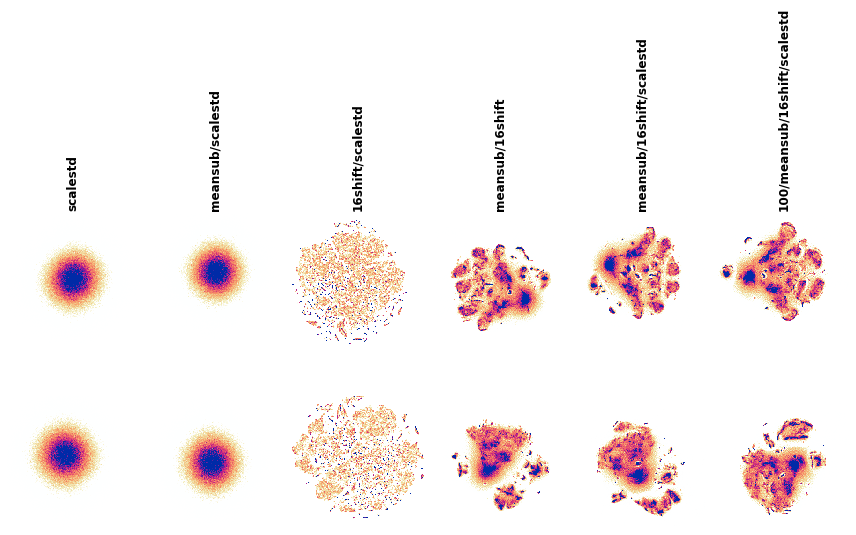

In [6]:
fig, ax = plt.subplots(2, 6, figsize=(12, 9))

plotDensity(False, True, 60, 0, True , ax[0][0], (25, 175), (25, 175))
plotDensity(False, True, 60, 0, False, ax[1][0], (25, 175), (25, 175))

plotDensity(True, True, 60, 0, True , ax[0][1], (25, 175), (25, 175))
plotDensity(True, True, 60, 0, False, ax[1][1], (25, 175), (25, 175))

plotDensity(False, True, 60, 16, True , ax[0][2], (0, 200), (0, 200))
plotDensity(False, True, 60, 16, False, ax[1][2], (0, 200), (0, 200))

plotDensity(True, False, 60, 16, True , ax[0][3], (25, 175), (25, 175))
plotDensity(True, False, 60, 16, False, ax[1][3], (25, 175), (25, 175))

plotDensity(True, True, 60, 16, True , ax[0][4], (25, 175), (25, 175))
plotDensity(True, True, 60, 16, False, ax[1][4], (25, 175), (25, 175))

plotDensity(True, True, 100, 16, True , ax[0][5], (25, 175), (25, 175))
plotDensity(True, True, 100, 16, False, ax[1][5], (25, 175), (25, 175))

ax[0][0].set_title('scalestd', rotation=90)
ax[0][1].set_title('meansub/scalestd', rotation=90)
ax[0][2].set_title('16shift/scalestd', rotation=90)
ax[0][3].set_title('meansub/16shift', rotation=90)
ax[0][4].set_title('meansub/16shift/scalestd', rotation=90)
ax[0][5].set_title('100/meansub/16shift/scalestd', rotation=90)

fig.tight_layout()
fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig_Suppl_4.pdf', dpi=500)